Batches:
	X, Y, mask, time :  torch.Size([1, 500, 302]) torch.Size([1, 500, 302]) torch.Size([1, 302]) torch.Size([1, 500])
	X, Y, mask, time :  torch.Size([1, 500, 302]) torch.Size([1, 500, 302]) torch.Size([1, 302]) torch.Size([1, 500])


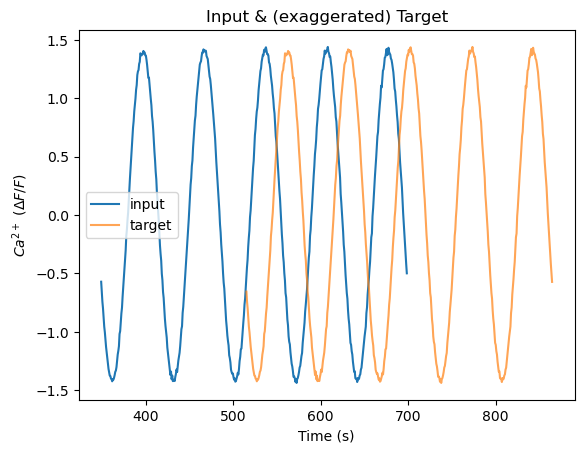

In [43]:
"""
Tests whether the dataset and 
data loader generates samples 
and batches, respectively, as expected.
"""

import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from data._utils import NeuralActivityDataset, load_dataset

# load a dataset (multiple worms)
worm_dataset = "Sines0000"
datasets = load_dataset(worm_dataset)
wormID = "worm0"
single_worm_dataset = datasets[wormID]
# get calcium data from one worm
data = single_worm_dataset["calcium_data"]
time_vec = single_worm_dataset["time_in_seconds"]
neurons_mask = single_worm_dataset["named_neurons_mask"]
# create a NeuralActivity dataset from `calcium_data`
neural_dataset = NeuralActivityDataset(
    data,
    time_vec,
    neurons_mask,
    wormID,
    worm_dataset,
    seq_len=500,
    num_samples=2,
    reverse=False,
    use_residual=False,
)
# create dataloader from neural dataset
loader = DataLoader(
    neural_dataset,
    batch_size=1,
    shuffle=False,
    pin_memory=True,
)
# display shapes of batches
print("Batches:")
for data in loader:
    X, Y, mask, meta = data
    time = meta["time_vec"]
    print("\tX, Y, mask, time : ", X.shape, Y.shape, mask.shape, time.shape)

# last batch and last sample. input and target from first named neuron
plt.figure()
plt.plot(
    time[-1, :].numpy(),
    X[-1, :, mask.squeeze()][:, 0].numpy(),
    label="input",
)
plt.plot(
    time[-1, :].numpy() + len(time[-1, :]) // 3,
    Y[-1, :, mask.squeeze()][:, 0].numpy(),
    label="target",
    alpha=0.7,
)
plt.xlabel("Time (s)")
plt.ylabel("$Ca^{2+}$ ($\Delta F / F$)")
plt.title("Input & (exaggerated) Target")
plt.legend()
plt.show()